In [1]:
%config Completer.use_jedi = False
%matplotlib inline
#%load_ext lab_black

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/card_transactions.csv"
)

In [4]:
df.head()

customer_id  balance_account  ...  min_payments  full_payment_prc
0  tGEg8fT2eCgVxdwS         9.298409  ...     89.711672          0.428571
1  stEDu20sSKOXomjg        52.666422  ...     82.955180          0.000000
2  CEB2blrN3b88GsRe      1360.795674  ...    443.781316          0.000000
3  0N0eBl8ySaZThxKE      2021.641161  ...    795.859808          0.000000
4  6NLauoHUwtwOv4Wy        22.322374  ...     40.142262          0.000000

[5 rows x 18 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [6]:
df = df.drop(columns="customer_id", axis=1)

In [7]:
df[df["credit_limit"].isna()] # drop

balance_account  purchases_amount  ...  min_payments  full_payment_prc
7898        18.400472               0.0  ...     14.418723               0.0

[1 rows x 17 columns]

In [8]:
df = df.drop(labels=7898, axis=0)

In [9]:
df[df["min_payments"].isna()] # knn-imputation --> check how model handels vs. other imputing method...

balance_account  purchases_amount  ...  min_payments  full_payment_prc
24         463.071440           1817.84  ...           NaN               0.0
27          28.329892            292.59  ...           NaN               0.0
29           0.000000            240.10  ...           NaN               0.0
38          61.463647              0.00  ...           NaN               0.0
56         253.143106              0.00  ...           NaN               0.0
...               ...               ...  ...           ...               ...
8395       212.306148              0.70  ...           NaN               0.0
8422       253.083620              0.00  ...           NaN               0.0
8460       147.418569           1074.00  ...           NaN               0.0
8490         0.000000            232.20  ...           NaN               0.0
8497         0.000000              0.00  ...           NaN               0.0

[298 rows x 17 columns]

In [10]:
# are there any negative values?
(df < 0).any()#.any()

balance_account                     False
purchases_amount                    False
paid_advance                        False
full_purchases                      False
balance_frequency_update            False
installments                        False
purchases_frequency                 False
full_purchases_frequency            False
purchases_installments_frequency    False
cash_advance_frequency              False
nr_cash_advances                    False
nr_purchases                        False
credit_limit                        False
fixed_rate_period                   False
payments                            False
min_payments                        False
full_payment_prc                    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


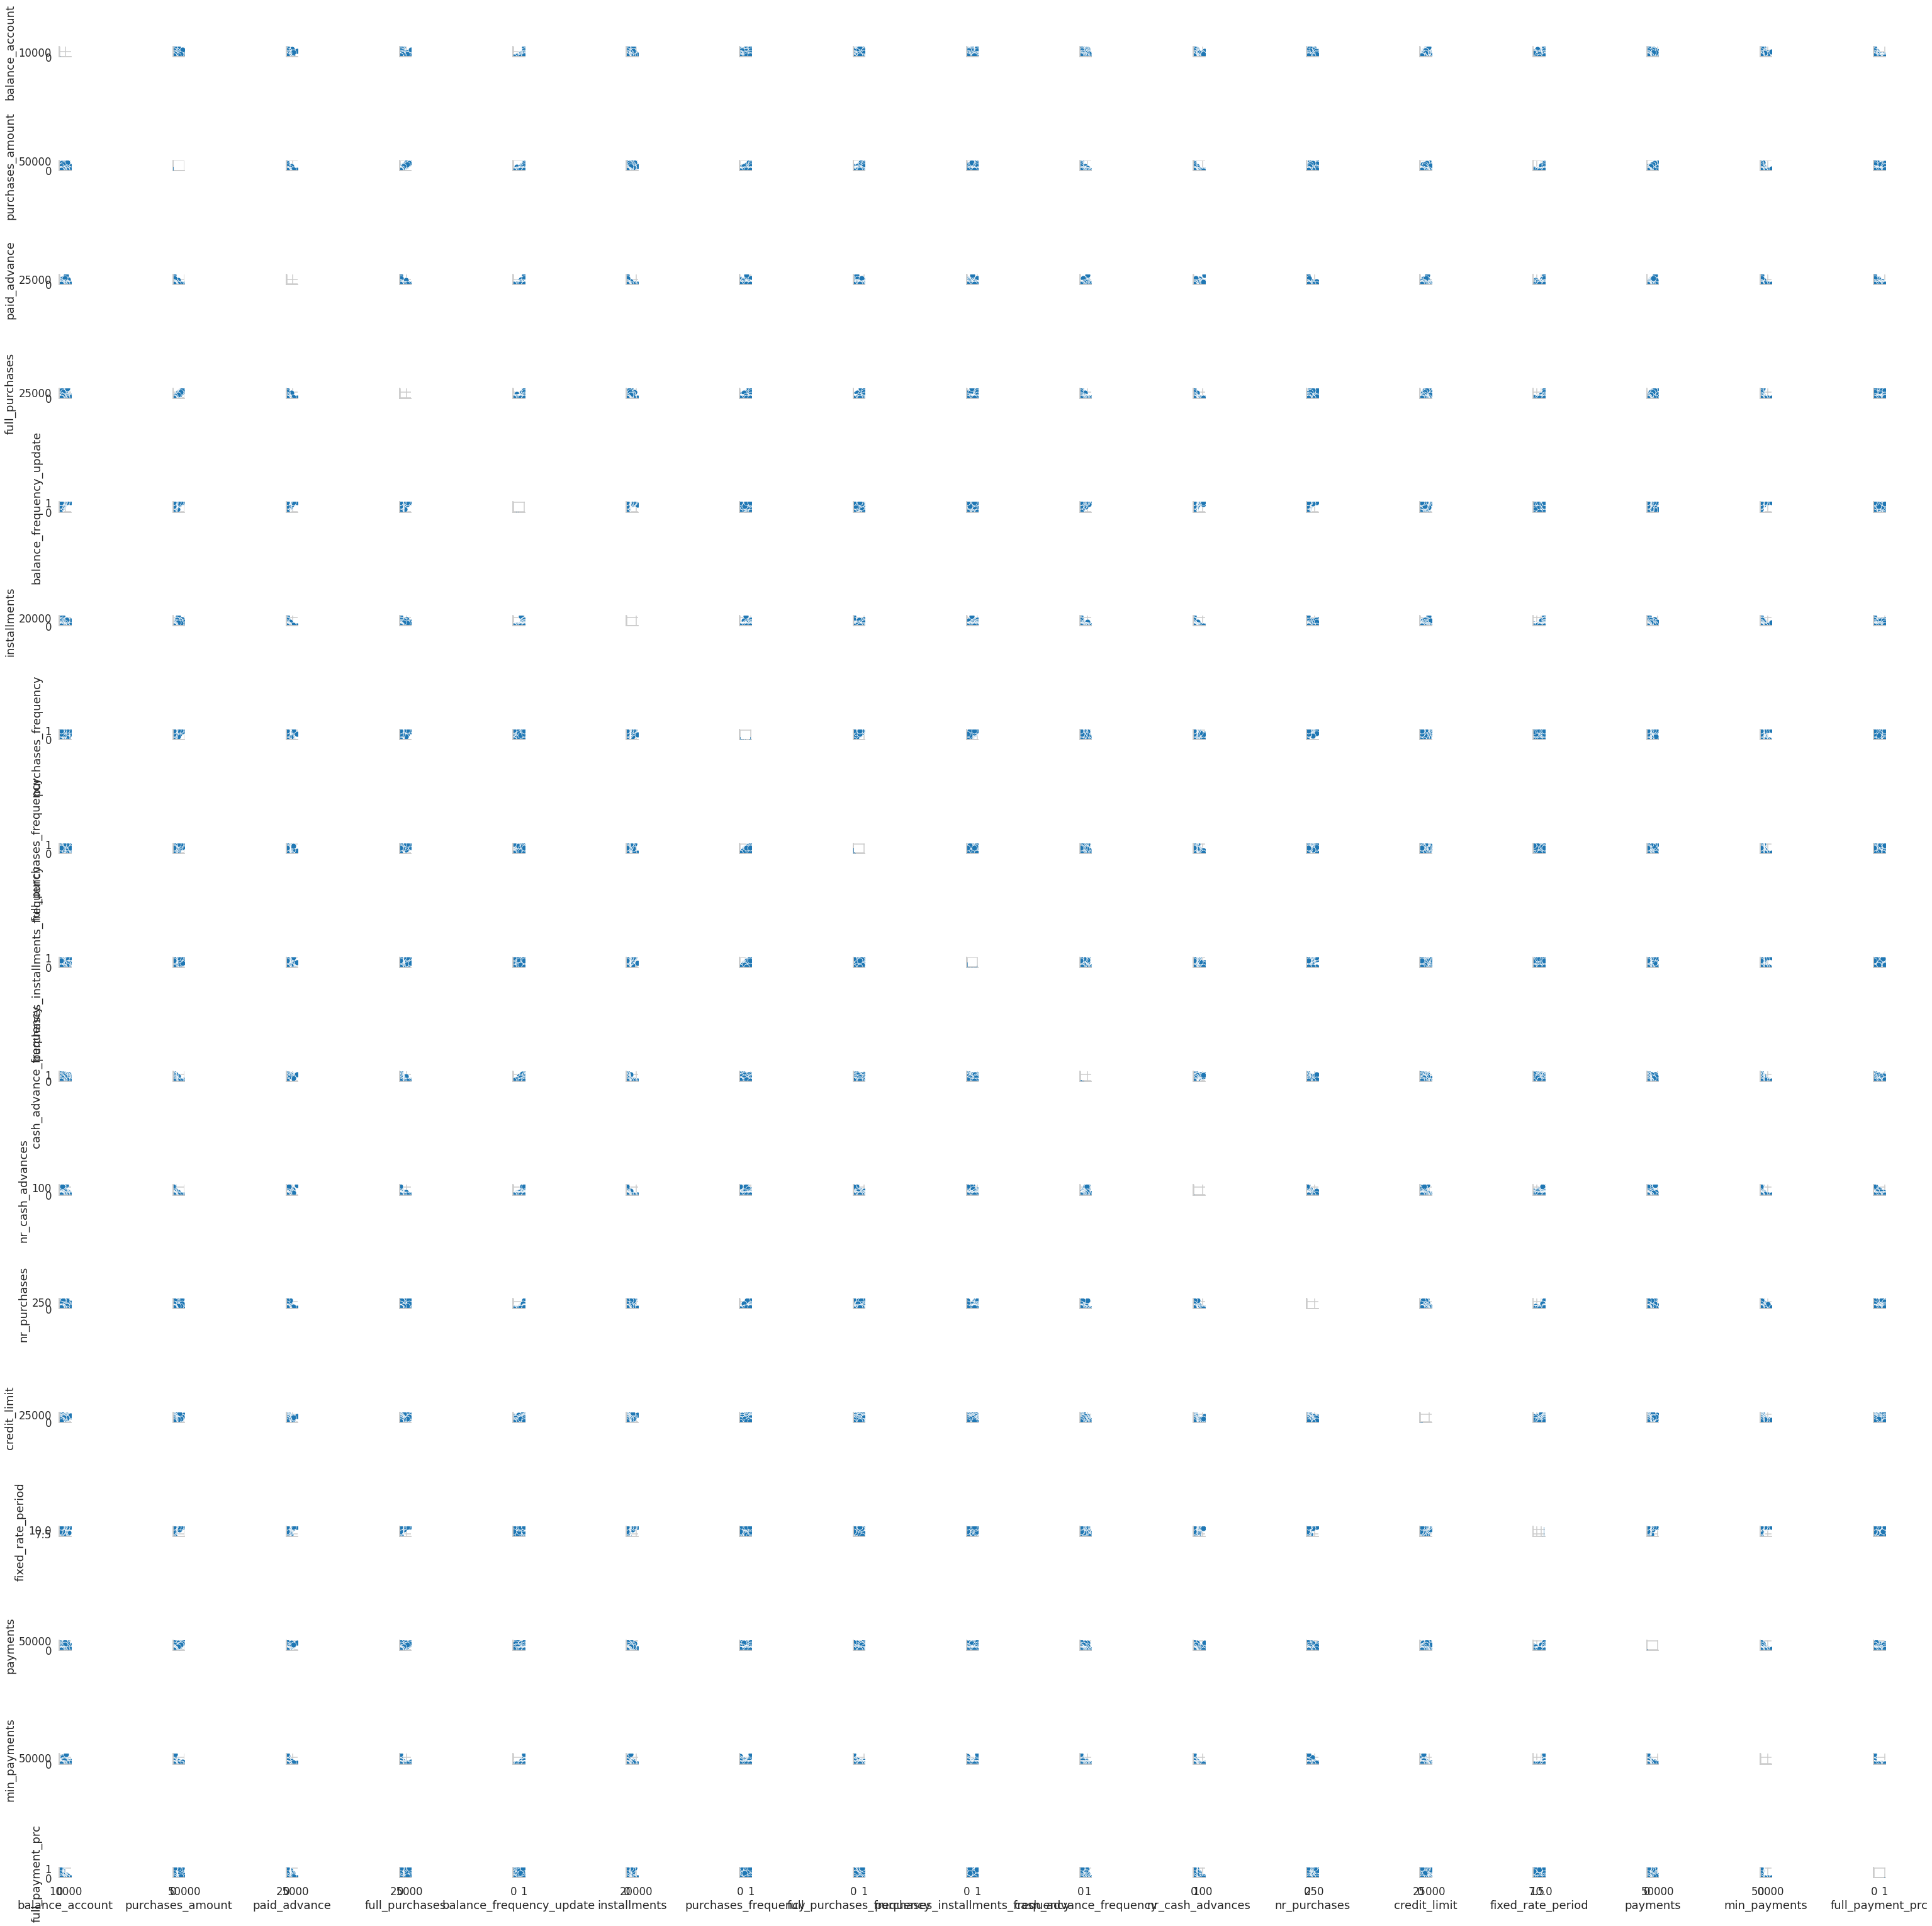

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

sns.pairplot(df)
plt.show()

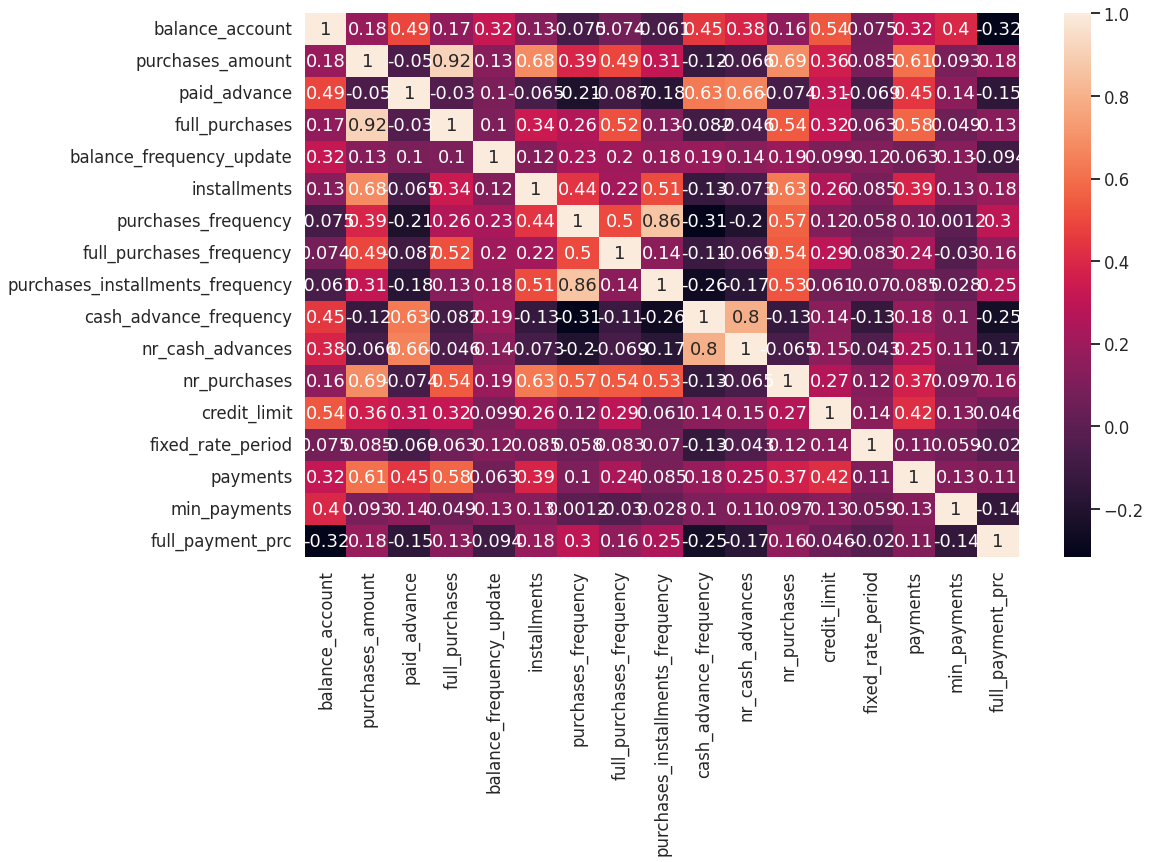

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(
    df.corr(),
    annot=True,
)
plt.show()

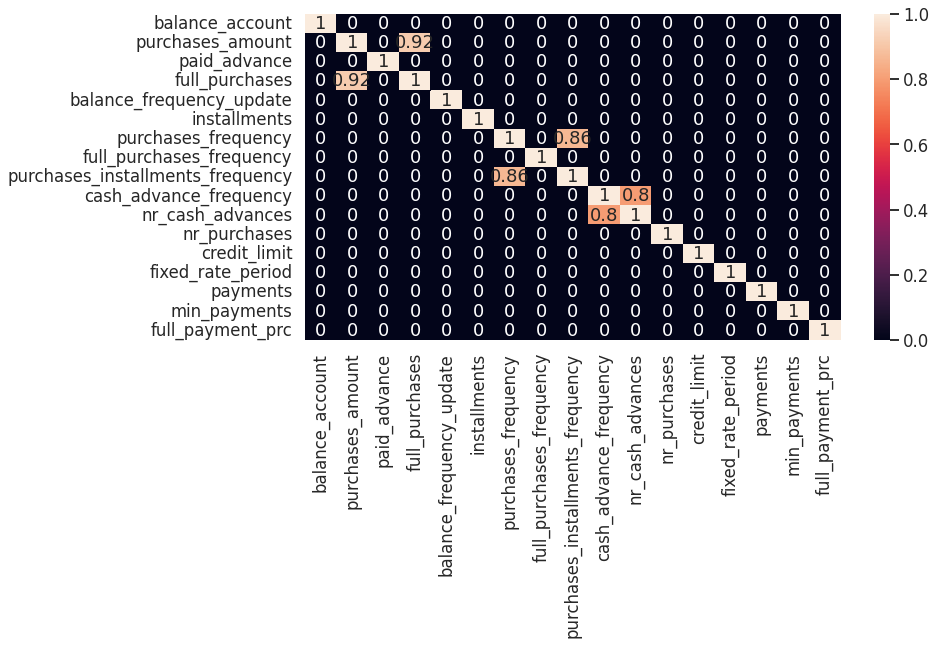

In [29]:
r = df.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(12, 6))
sns.heatmap(r, annot=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

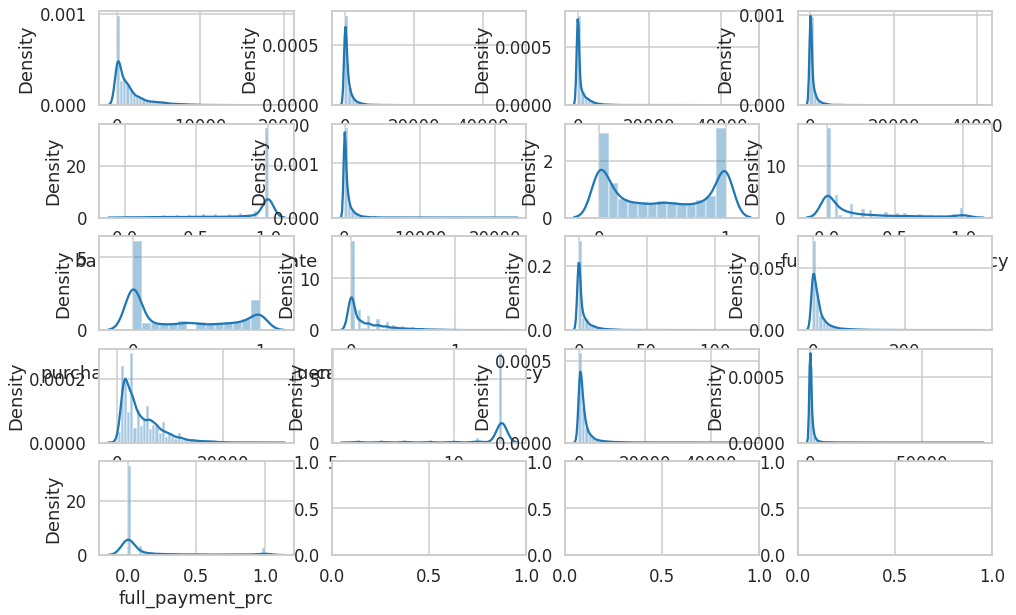

In [30]:
# import matplotlib.pyplot as plt

# Define the number of rows and columns you want
n_rows = 5
n_cols = 4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))

for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=axes[i // n_cols, i % n_cols])

In [ ]:

g = sns.FacetGrid(df, col=df.Columns)

In [ ]:
df.info()

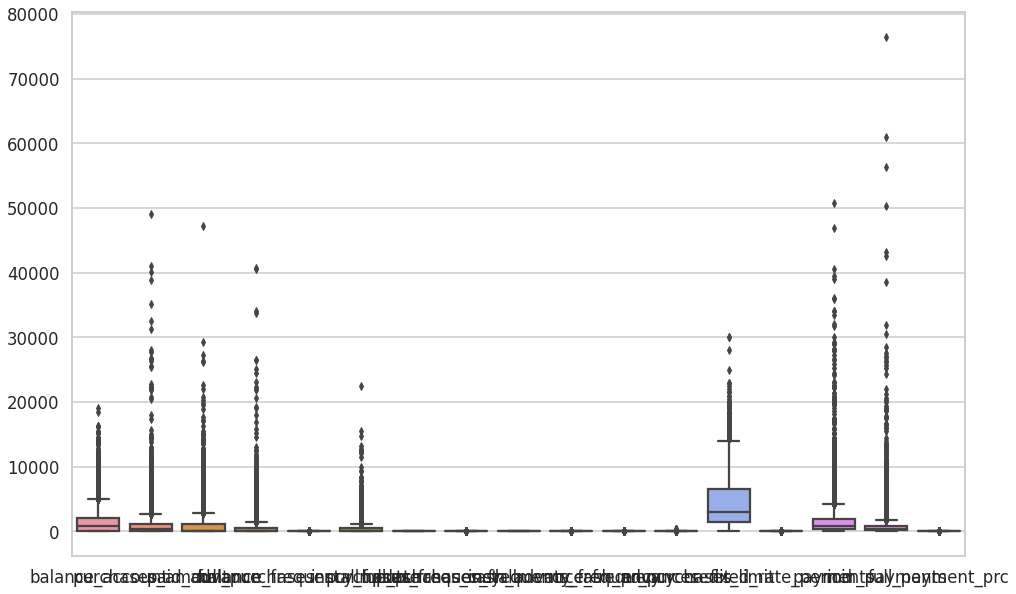

In [31]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

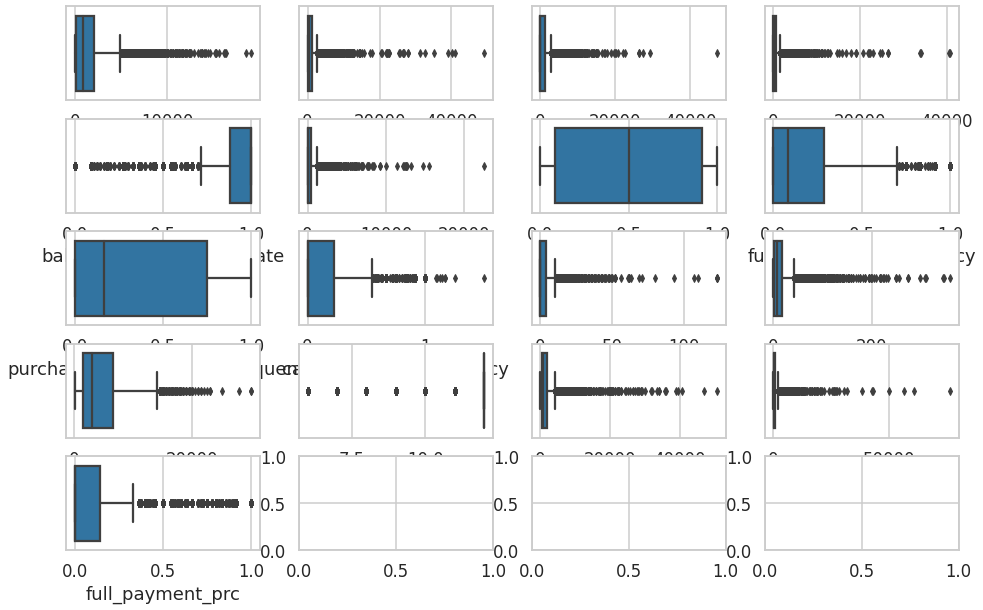

In [32]:
# import matplotlib.pyplot as plt

# Define the number of rows and columns you want
n_rows = 5
n_cols = 4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))

for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axes[i // n_cols, i % n_cols])

In [ ]:

# impute missings with KNN
# scale data with StandardScaler --> numerical data

# K-medoids
# hierarchical clustering
# DBSCAN

# Choice of K
# Elbow method
# Silhouette method

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [13]:
sklearn.__version__

'1.0.1'

In [ ]:
!pip install scikit-learn-extra

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import KMeans 



sc = StandardScaler()
knn_imp = KNNImputer(n_neighbors=5)
kmed = KMedoids()

kmed_pipeline = Pipeline(
    steps=[("imputation", knn_imp),
           ("data_scaling", sc),
           ("cluster", kmed)]
    )


In [15]:
kmed_pipeline.fit(df)

Pipeline(steps=[('imputation', KNNImputer()),
                ('data_scaling', StandardScaler()), ('cluster', KMedoids())])

In [12]:
from sklearn.cluster import KMeans

ss = []
cluster_ranges = range(2, 17)

for K in cluster_ranges:
    # fit a k-means model
    kmed = KMedoids(n_clusters=K, random_state=42)
    kmed_pipeline = Pipeline(
    steps=[("imputation", knn_imp),
           ("data_scaling", sc),
           ("cluster", kmed)]
    )
    fit = kmed_pipeline.fit_predict(df)
    # stores the ss errors.
    ss.append(kmed.inertia_)

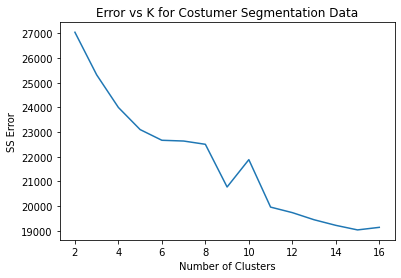

In [14]:
import seaborn as sns
ax = sns.lineplot(x=cluster_ranges, y=ss)
ax.set_title("Error vs K for Costumer Segmentation Data")
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SS Error');

In [15]:
imputer = KNNImputer(n_neighbors=5)
scaler = StandardScaler()
df_imputed = imputer.fit_transform(df)
df_imp_scal = scaler.fit_transform(df_imputed)
df_imp_scal = pd.DataFrame(df_imp_scal, columns=["balance_account","purchases_amount","paid_advance","full_purchases","balance_frequency_update","installments","purchases_frequency","full_purchases_frequency","purchases_installments_frequency","cash_advance_frequency","nr_cash_advances","nr_purchases","credit_limit","fixed_rate_period","payments","min_payments","full_payment_prc"])

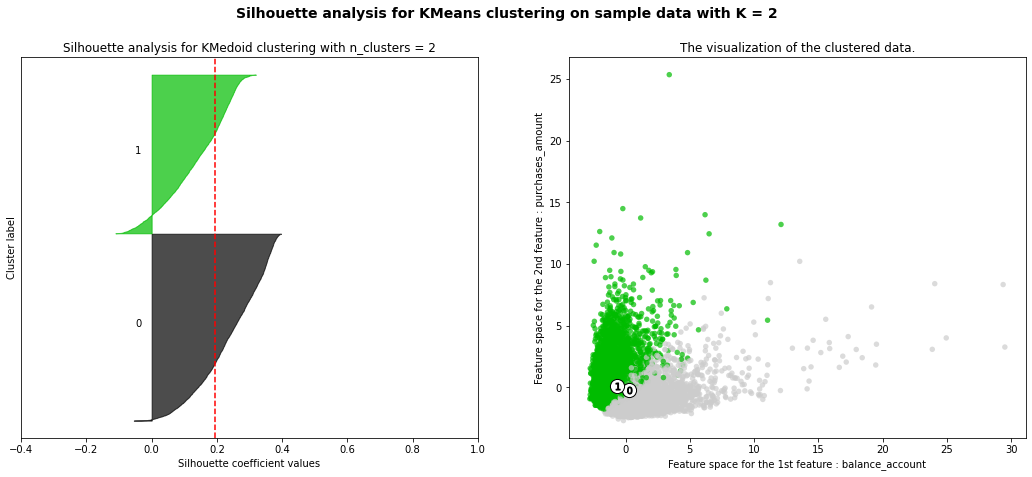

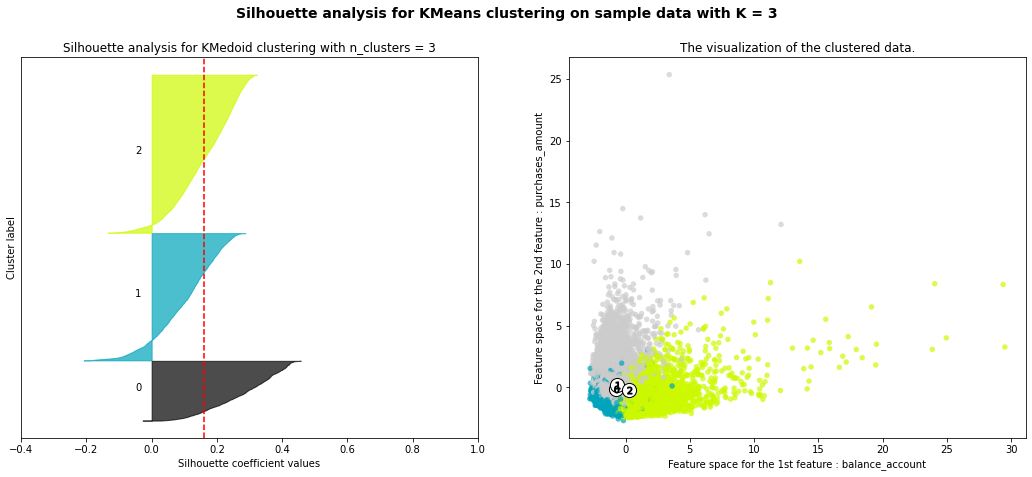

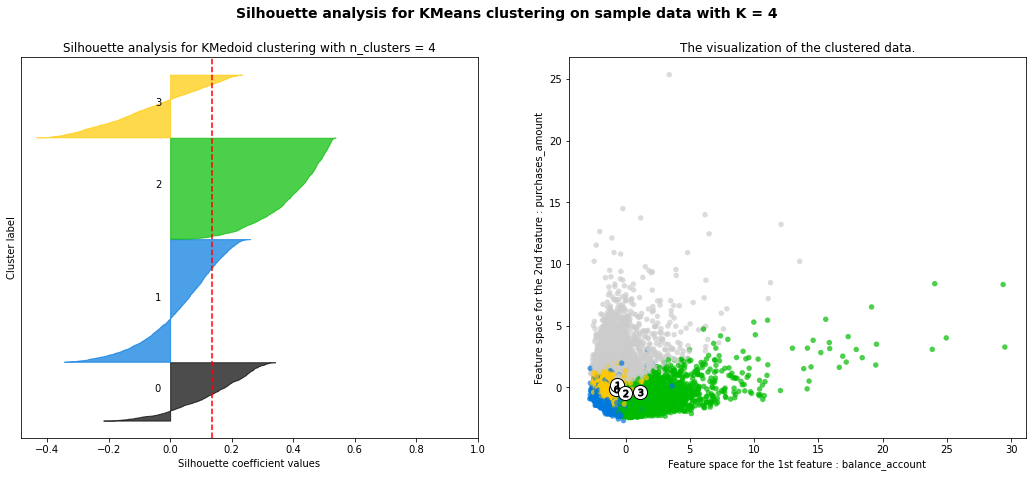

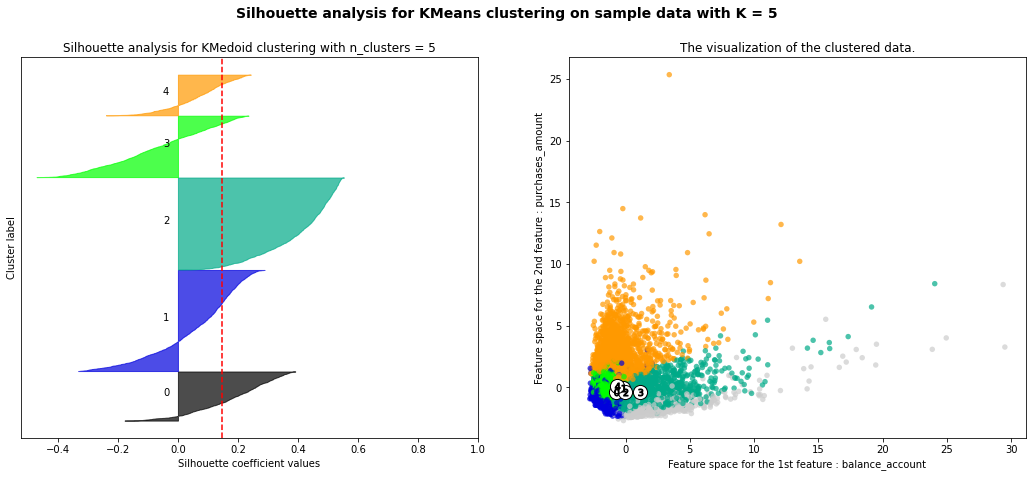

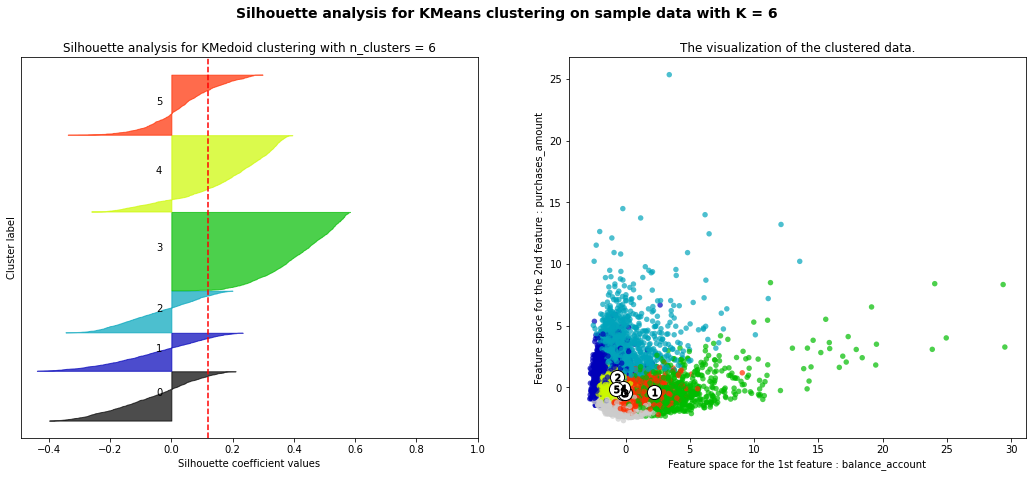

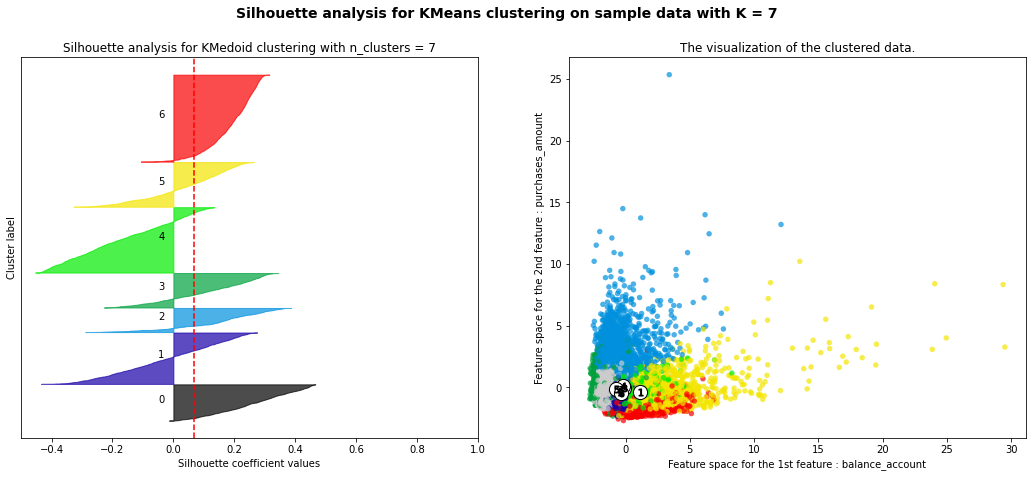

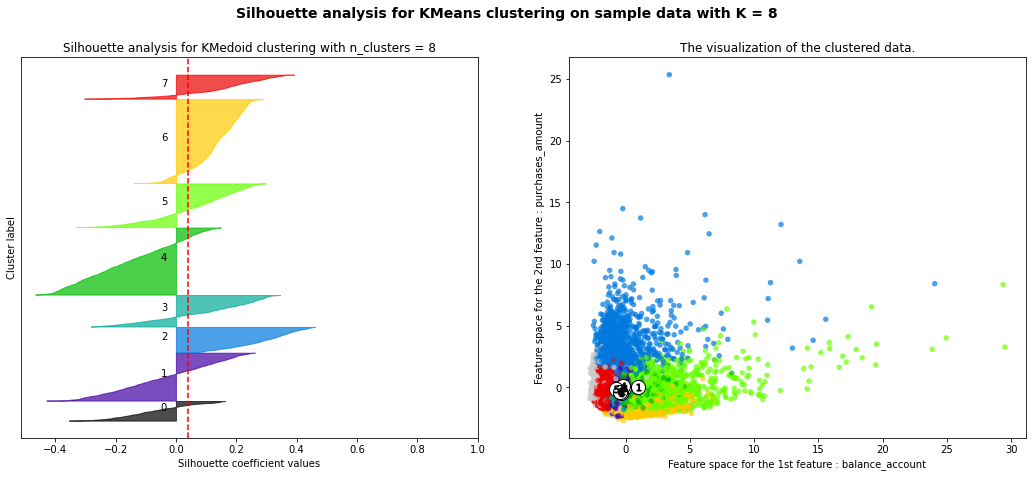

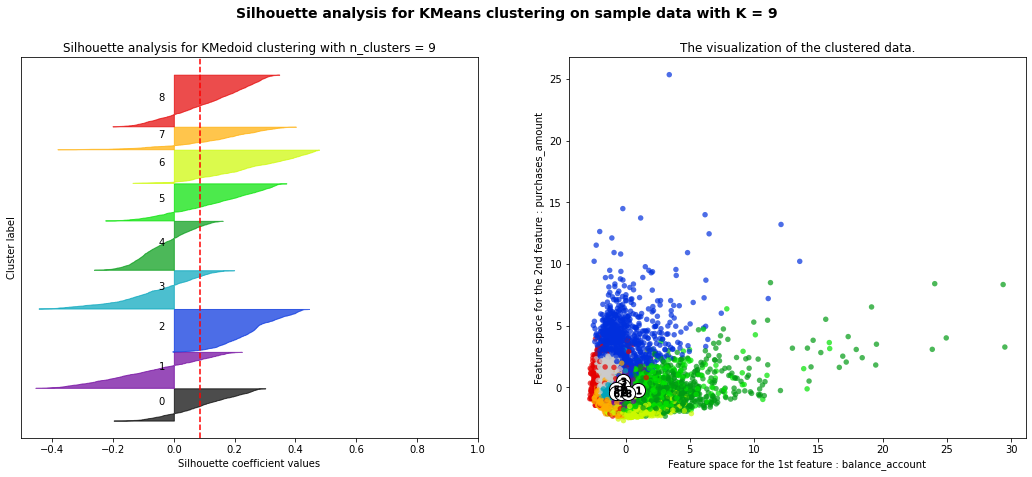

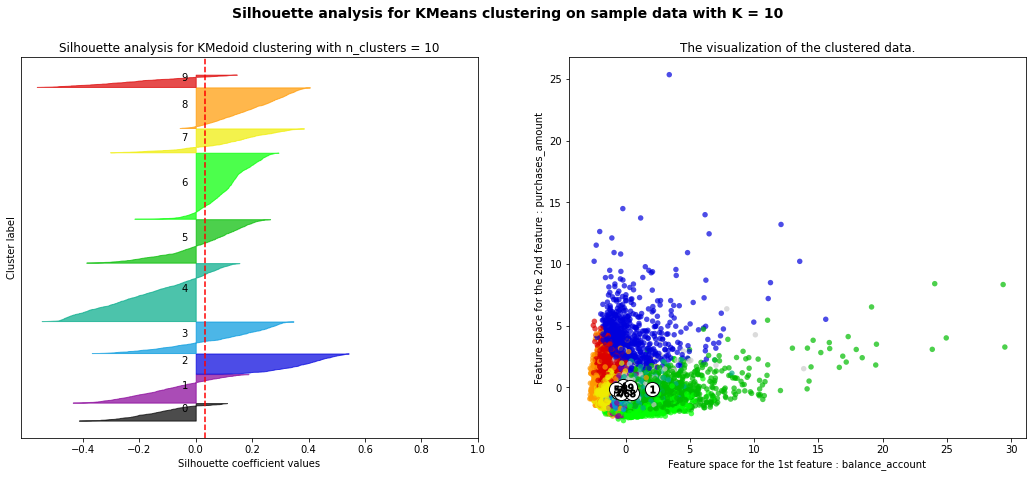

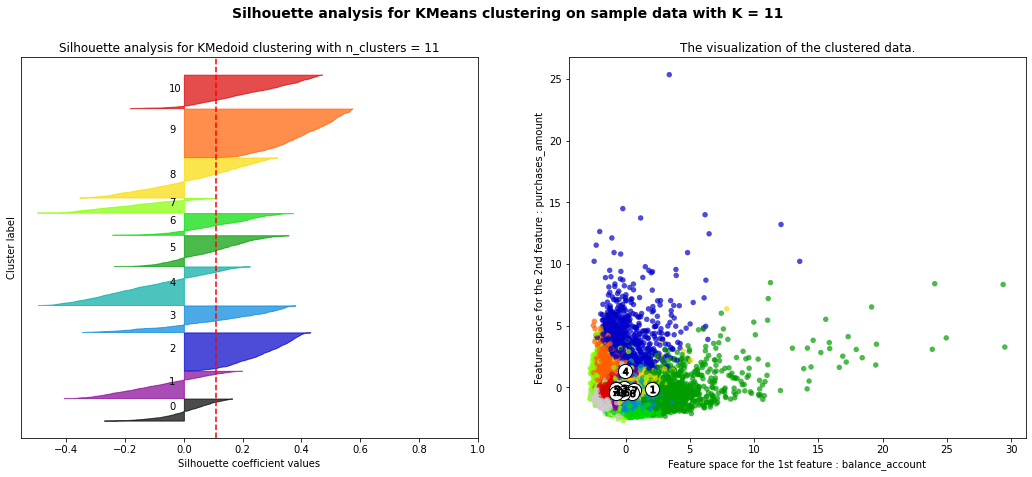

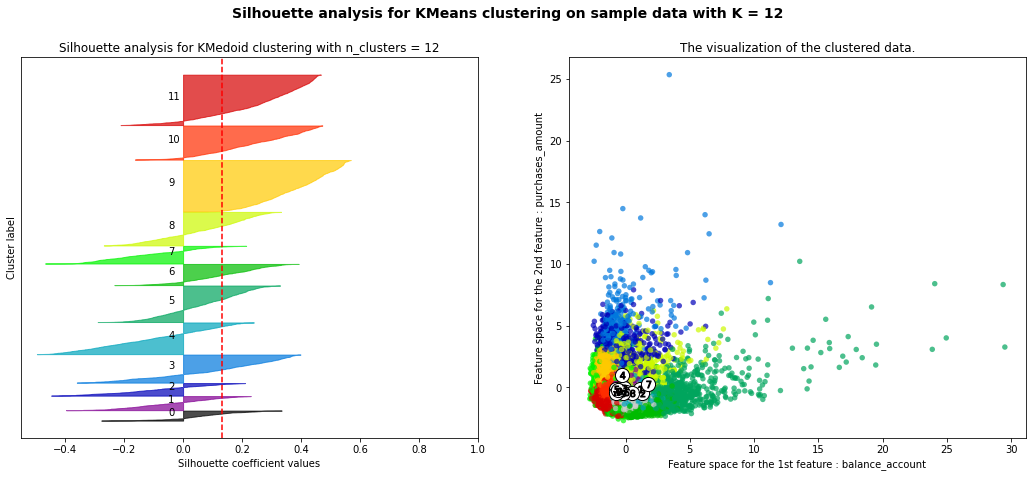

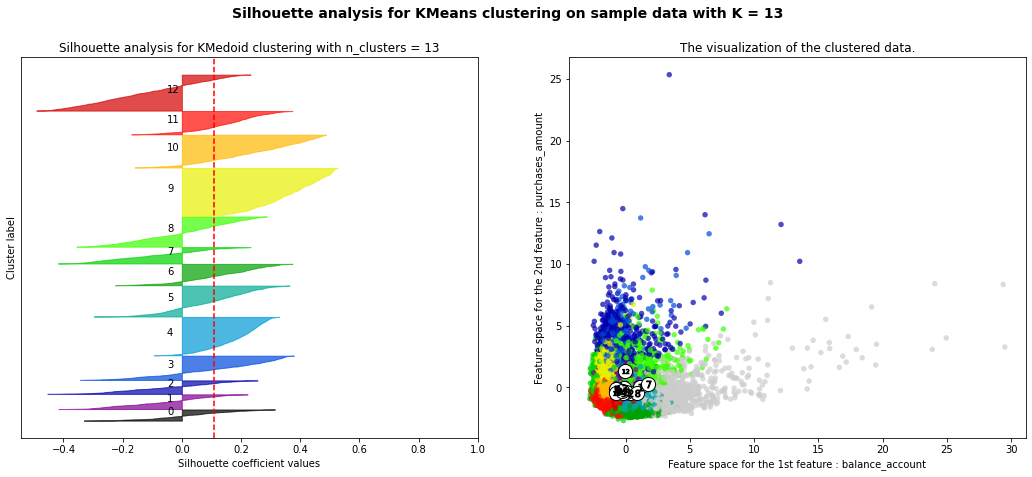

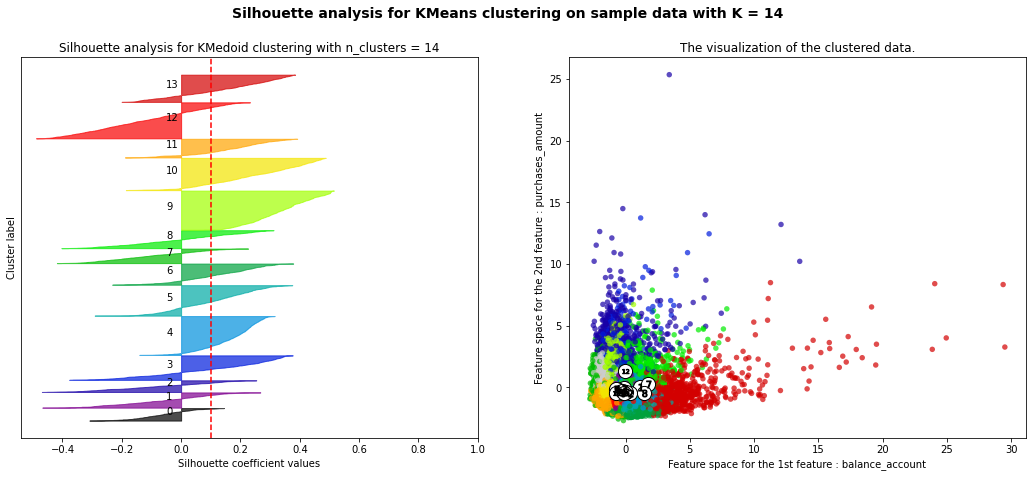

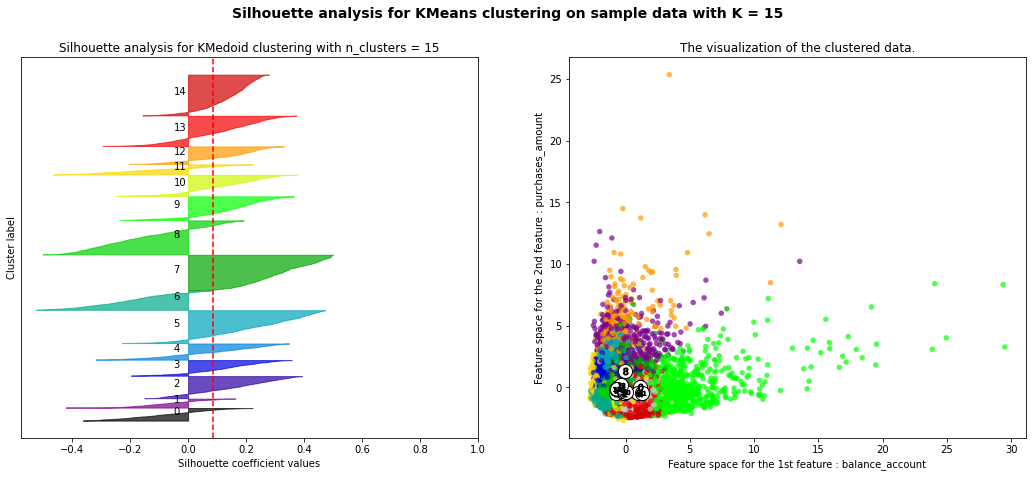

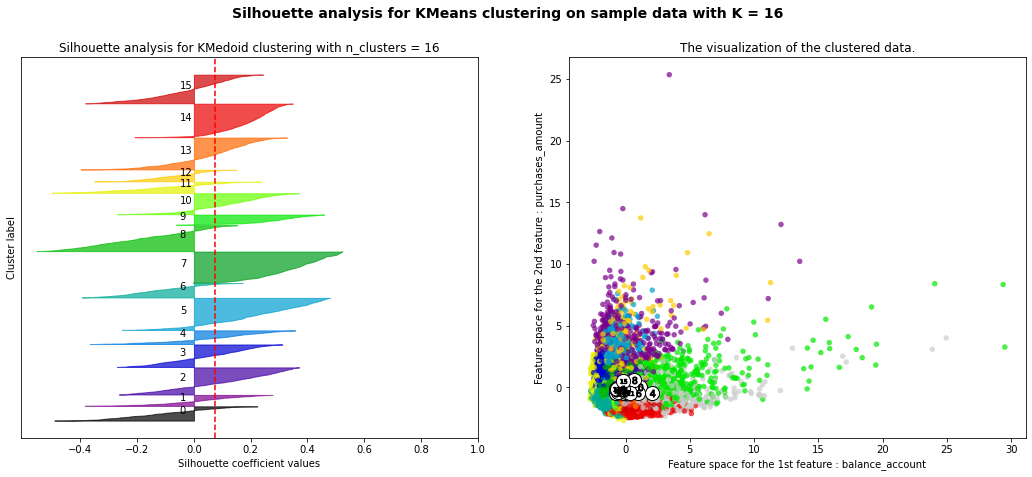

In [16]:
# Code adapted from scikit-learn documentation example.

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from pandas import *
import numpy as np

cols = df_imp_scal.columns
avg_silhouette_scores = []
cluster_ranges = range(2, 17)

# Get rid of warning of too many plots open
plt.rcParams.update({'figure.max_open_warning': 0})

for K in cluster_ranges:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-.4, 1])
    # The (K+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(df_imp_scal) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    kmed = KMedoids(n_clusters=K, random_state=42)
    kmed_pipeline = Pipeline(steps=[("cluster", kmed)])
    cluster_labels = kmed_pipeline.fit_predict(df_imp_scal)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = (silhouette_score(df_imp_scal, cluster_labels))
    avg_silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_imp_scal, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette analysis for KMedoid clustering with n_clusters = {K}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / K)
    # to visualize the actual data in a continuous space we use PCA
    pca = PCA(n_components=2).fit(df_imp_scal)
    data2D = pca.transform(df_imp_scal)
    ax2.scatter(data2D[:, 0], data2D[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmed.cluster_centers_
    # Draw white circles at cluster centers


    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(f"Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel(f"Feature space for the 2nd feature : " + cols[1])

    plt.suptitle(
        (
            f"Silhouette analysis for KMedoid clustering on sample data with K = {K}"
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
 
plt.show()

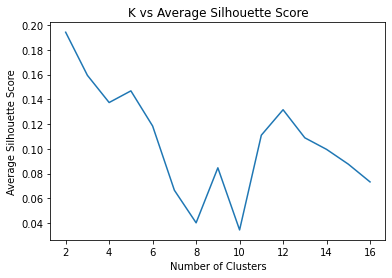

In [17]:
ax = sns.lineplot(x=cluster_ranges, y=avg_silhouette_scores)
ax.set_title('K vs Average Silhouette Score')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Average Silhouette Score');

In [42]:
from sklearn.decomposition import PCA

# First calculate top two PCA features. 
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
x = pca_features[:,0]
y = pca_features[:,1]

K=3

kmeans = KMeans(n_clusters=K, random_state=42)
cl_labels = kmeans.fit_predict(X)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels, 
                                'pc_1':x, 
                                'pc_2':y})
ax = sns.scatterplot(x='pc_1', y='pc_2', 
                hue='cluster_id', 
                size='cluster_id', 
                data=df_pca_features, 
                palette='tab20', 
                legend='full')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_title('PCA results of KMeans with ' + str(K) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');

AttributeError: ignored

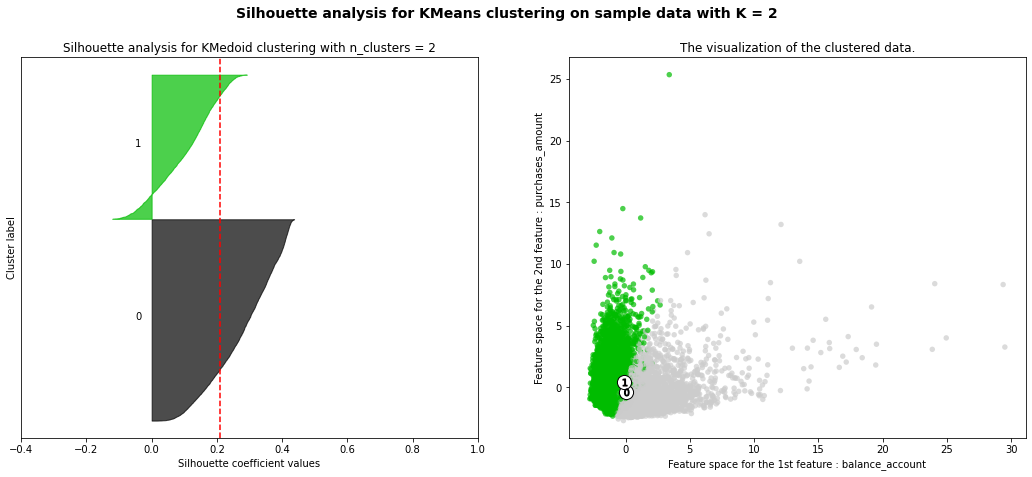

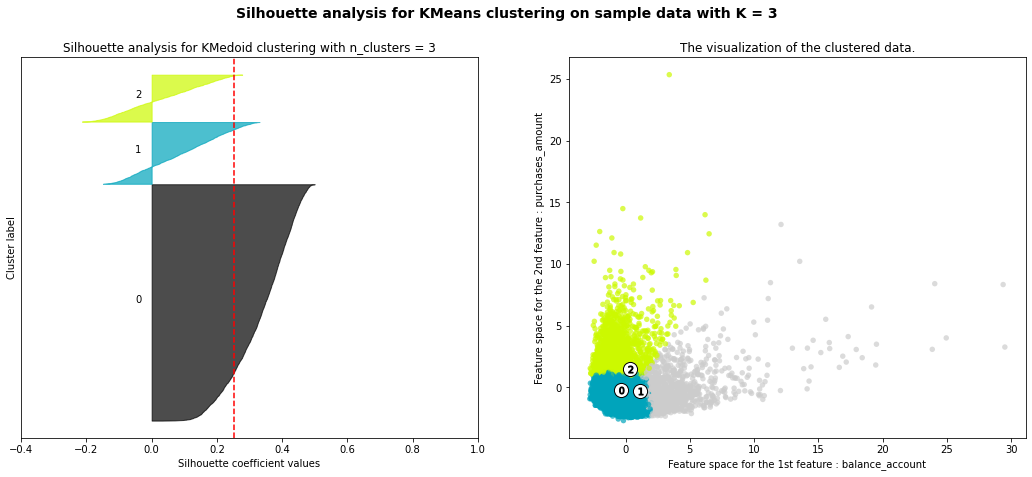

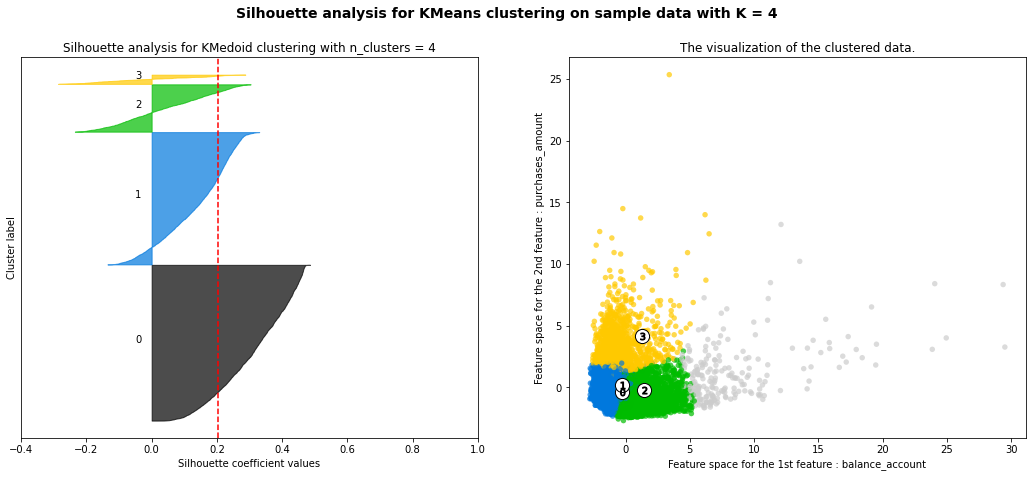

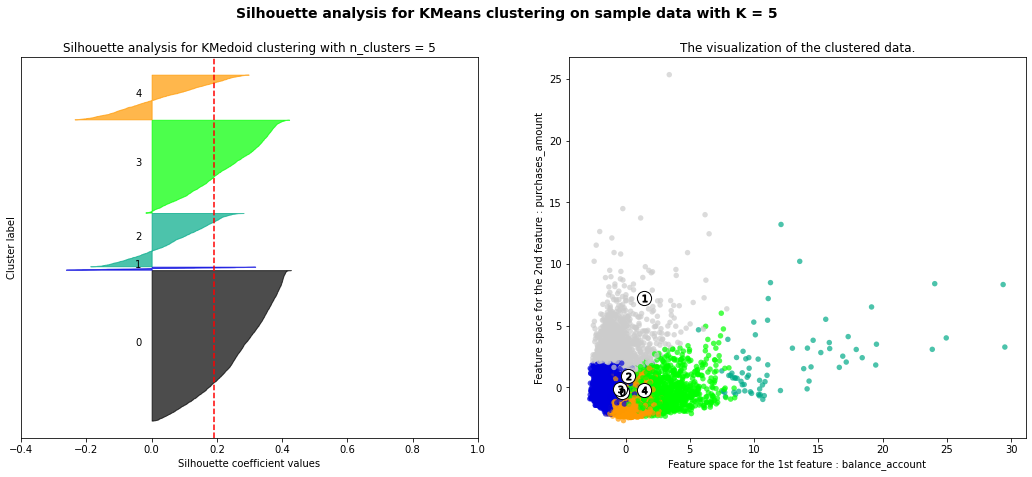

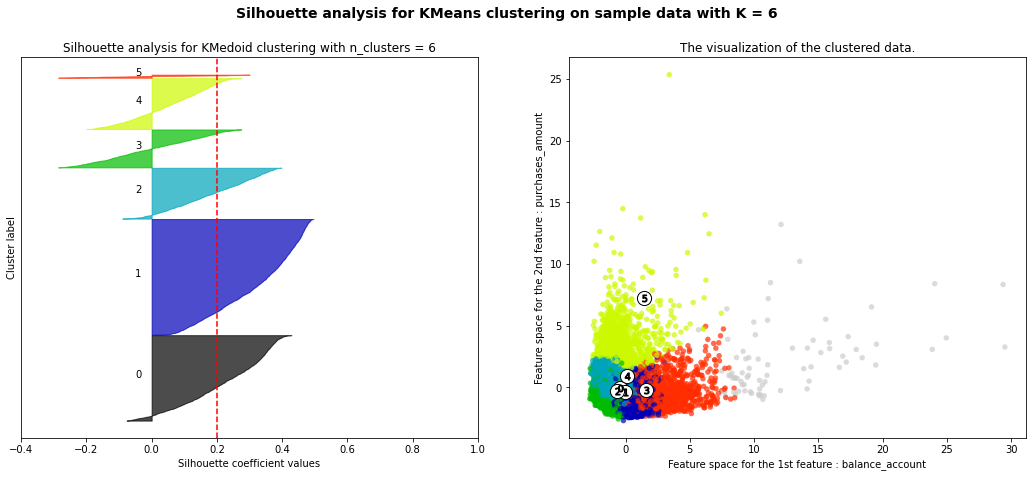

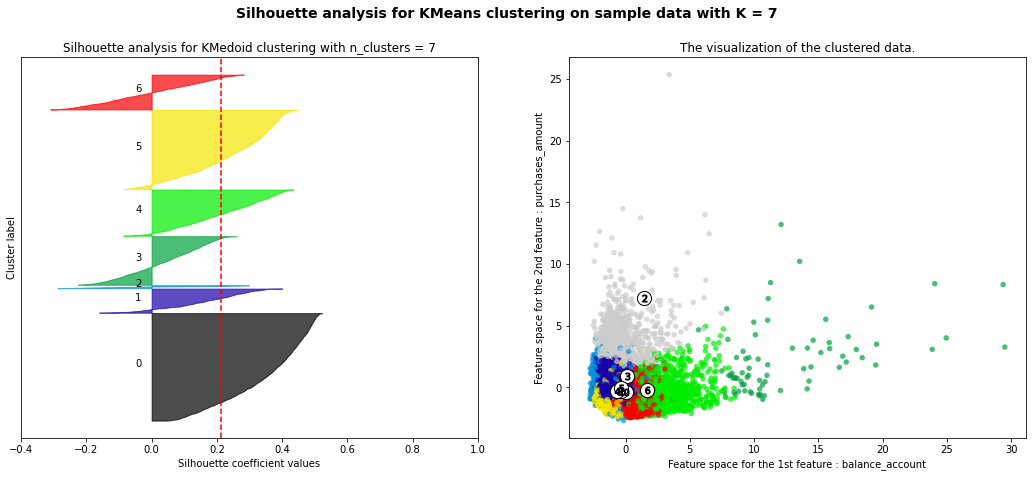

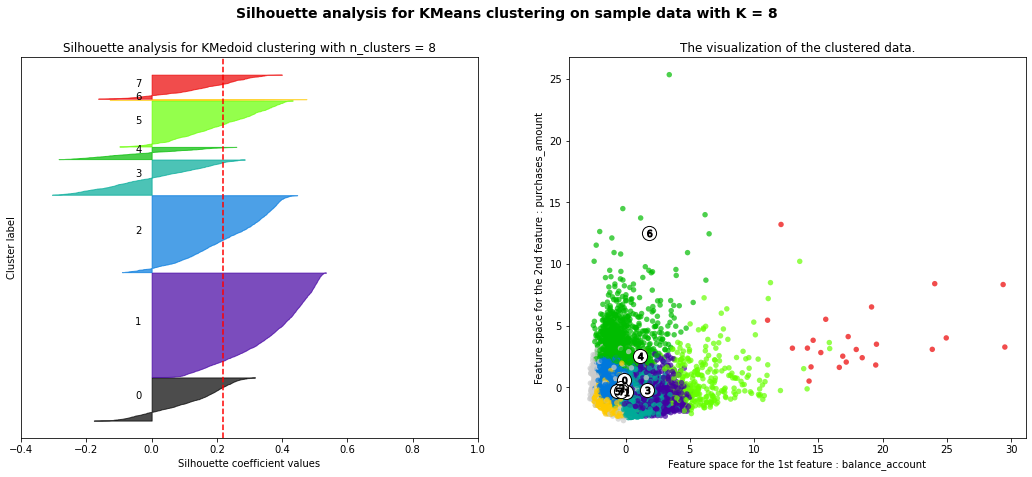

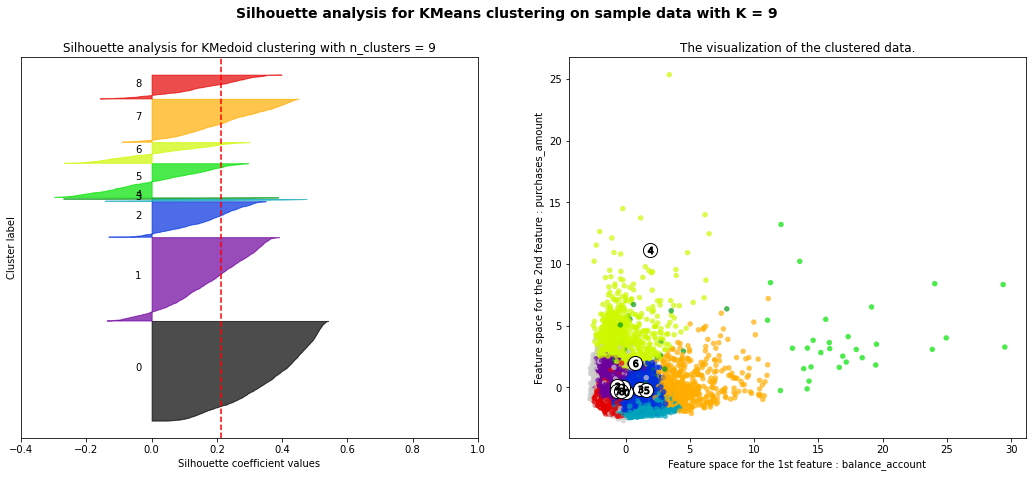

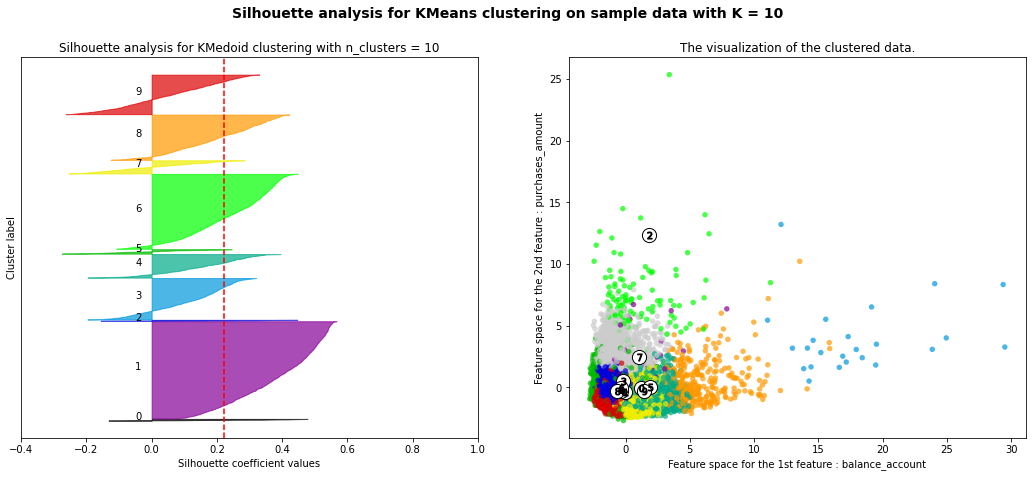

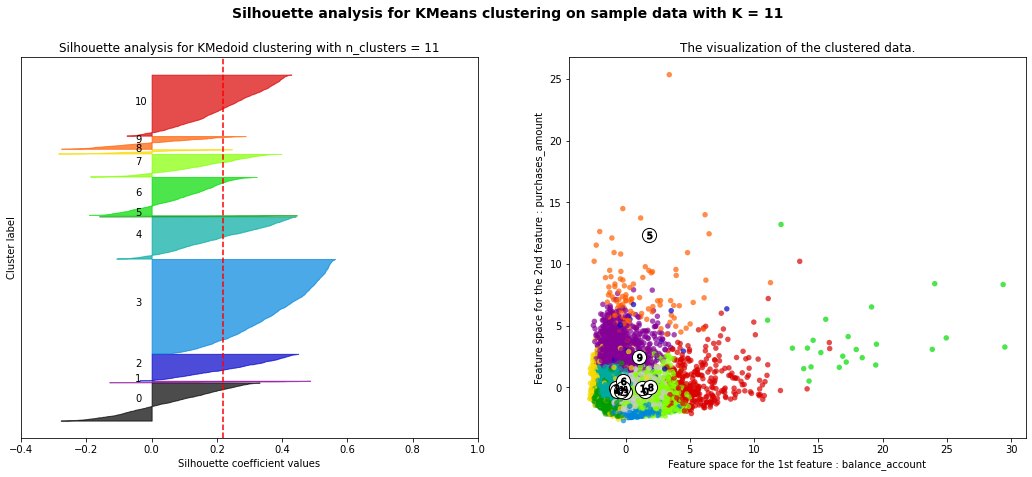

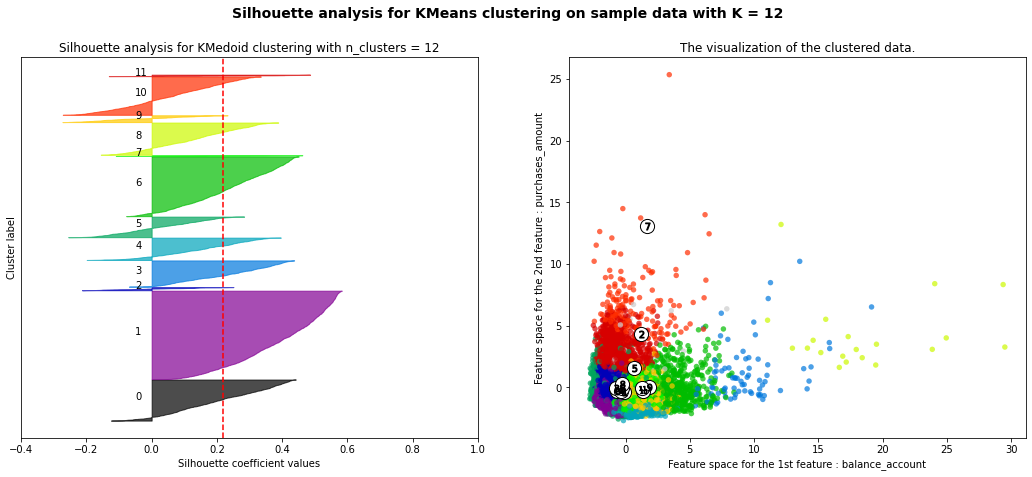

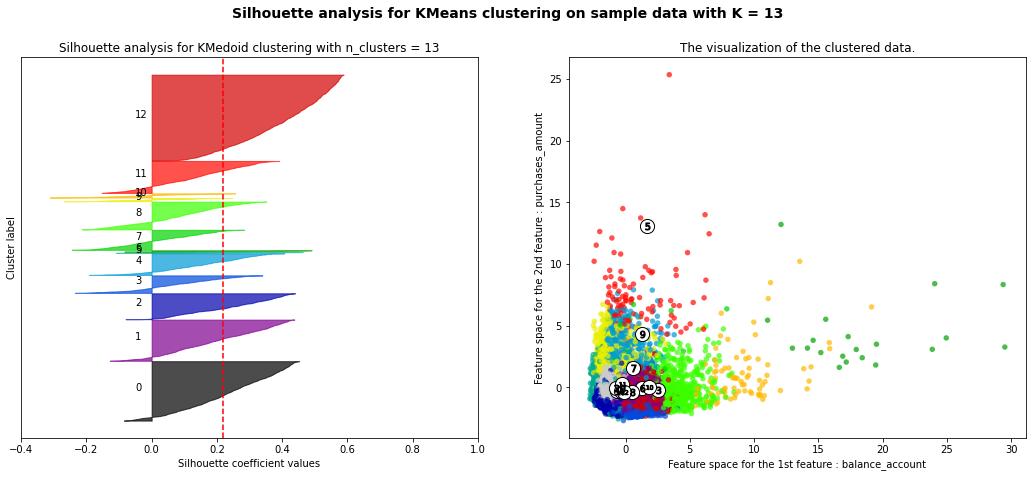

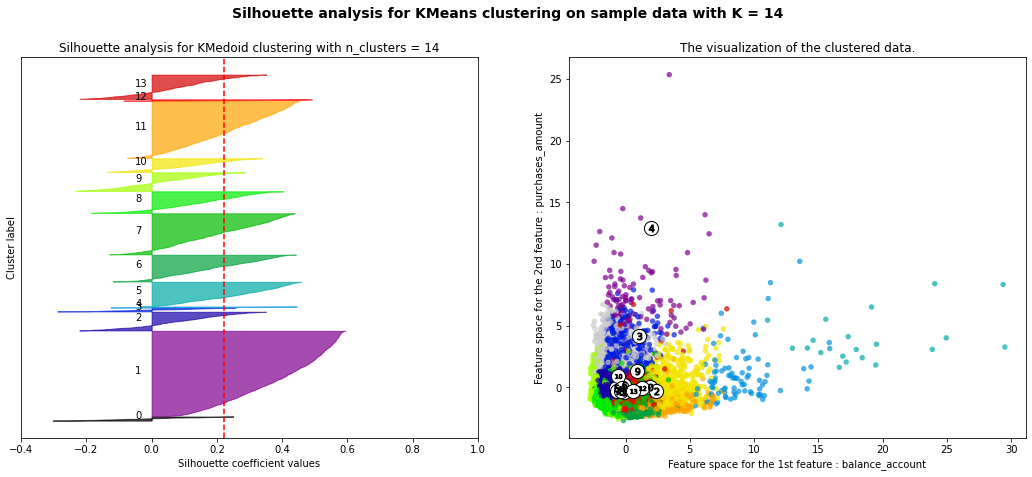

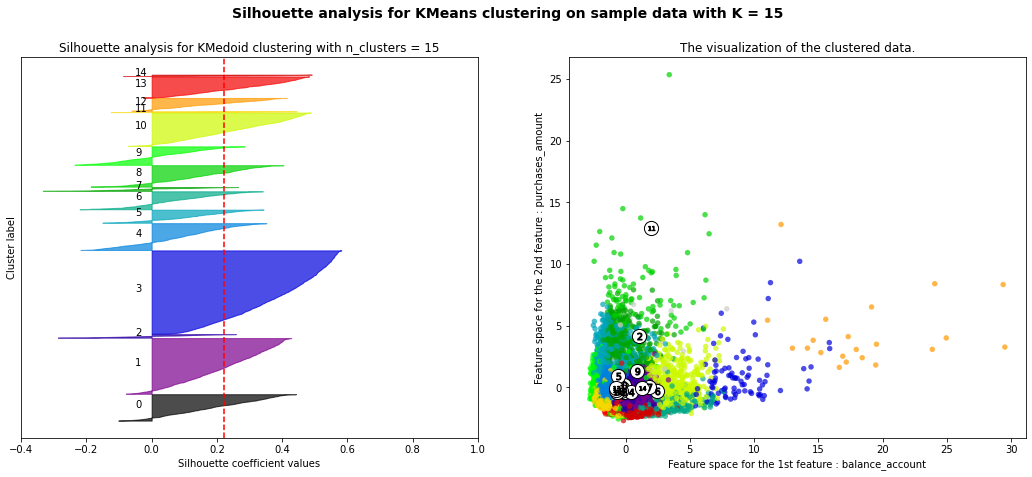

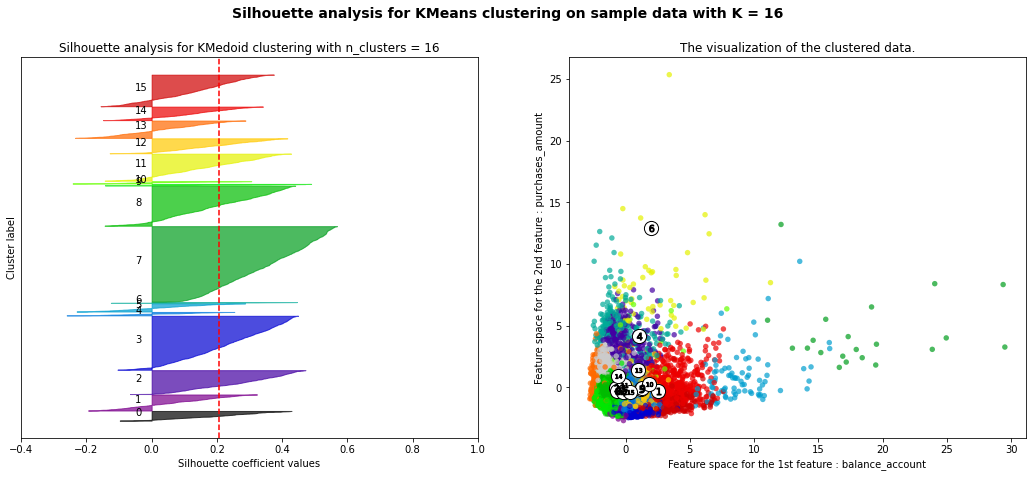

In [23]:
# Code adapted from scikit-learn documentation example.

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from pandas import *
import numpy as np

cols = df_imp_scal.columns
avg_silhouette_scores = []
cluster_ranges = range(2, 17)

# Get rid of warning of too many plots open
plt.rcParams.update({'figure.max_open_warning': 0})

for K in cluster_ranges:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax.set_xlim([-.4, 1])
    # The (K+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(df_imp_scal) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans_pipeline = Pipeline(steps=[("cluster", kmeans)])
    cluster_labels = kmeans_pipeline.fit_predict(df_imp_scal)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = (silhouette_score(df_imp_scal, cluster_labels))
    avg_silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_imp_scal, cluster_labels)

    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette analysis for KMeans clustering with n_clusters = {K}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / K)
    # to visualize the actual data in a continuous space we use PCA
    pca = PCA(n_components=2).fit(df_imp_scal)
    data2D = pca.transform(df_imp_scal)
    ax2.scatter(data2D[:, 0], data2D[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers


    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(f"Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel(f"Feature space for the 2nd feature : " + cols[1])

    plt.suptitle(
        (
            f"Silhouette analysis for KMeans clustering on sample data with K = {K}"
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
 
plt.show()

In [25]:
type(cluster_labels)

numpy.ndarray

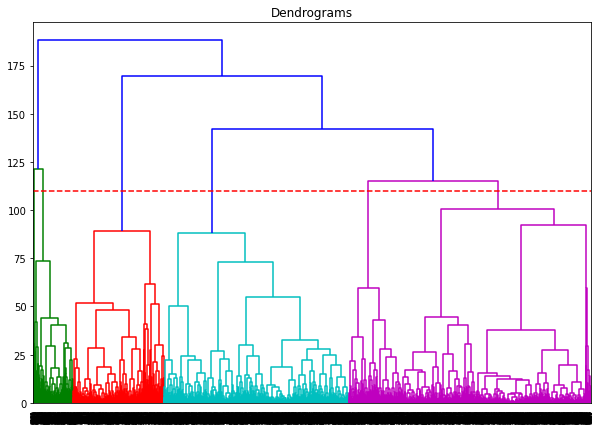

In [34]:
# hierarchical clusteranalysis...
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_imp_scal, method='ward'))
plt.axhline(y=110, color='r', linestyle='--')
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')  
cluster_hier_labels = cluster.fit_predict(df_imp_scal)

In [55]:
cluster_hier_labels = pd.Series(cluster_hier_labels)
labels_hier_df = pd.concat([df,cluster_hier_labels], axis=1)

In [57]:
labels_hier_df[0].value_counts()

0.0    3687
1.0    2818
2.0    1384
3.0     587
4.0      23
Name: 0, dtype: int64

In [31]:
dend.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

In [44]:
# assign clusters to costumers....
# concat pd.Series(cluster_labels) and original df

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import KMeans 



sc = StandardScaler()
knn_imp = KNNImputer(n_neighbors=5)
kmed = KMedoids(n_clusters=5)

kmed_pipeline = Pipeline(
    steps=[("imputation", knn_imp),
           ("data_scaling", sc),
           ("cluster", kmed)]
    )

cluster_labels_med = kmed_pipeline.fit_predict(df)

In [49]:
cluster_labels_med = pd.Series(cluster_labels_med)
labels_med_df = pd.concat([df,cluster_labels_med], axis=1)

In [50]:
labels_med_df

balance_account  purchases_amount  ...  full_payment_prc    0
0            9.298409            107.60  ...          0.428571  4.0
1           52.666422            150.30  ...          0.000000  1.0
2         1360.795674              0.00  ...          0.000000  2.0
3         2021.641161            363.18  ...          0.000000  1.0
4           22.322374             95.00  ...          0.000000  0.0
...               ...               ...  ...               ...  ...
8495      1127.607606              0.00  ...          0.000000  1.0
8496        21.409828            149.71  ...          0.166667  0.0
8497         0.000000              0.00  ...          0.000000  1.0
8498      1646.384530           1047.34  ...          0.000000  1.0
8499      1861.087370           1752.06  ...          0.000000  NaN

[8500 rows x 18 columns]

In [47]:
# assign clusters to costumers....
# concat pd.Series(cluster_labels) and original df

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import KMeans 



sc = StandardScaler()
knn_imp = KNNImputer(n_neighbors=5)
kmean = KMeans(n_clusters=5)

kmean_pipeline = Pipeline(
    steps=[("imputation", knn_imp),
           ("data_scaling", sc),
           ("cluster", kmean)]
    )

cluster_labels_means = kmean_pipeline.fit_predict(df)

In [51]:
cluster_labels_means = pd.Series(cluster_labels_means)
labels_mean_df = pd.concat([df,cluster_labels_means], axis=1)

In [52]:
labels_mean_df

balance_account  purchases_amount  ...  full_payment_prc    0
0            9.298409            107.60  ...          0.428571  1.0
1           52.666422            150.30  ...          0.000000  1.0
2         1360.795674              0.00  ...          0.000000  0.0
3         2021.641161            363.18  ...          0.000000  4.0
4           22.322374             95.00  ...          0.000000  0.0
...               ...               ...  ...               ...  ...
8495      1127.607606              0.00  ...          0.000000  1.0
8496        21.409828            149.71  ...          0.166667  0.0
8497         0.000000              0.00  ...          0.000000  4.0
8498      1646.384530           1047.34  ...          0.000000  4.0
8499      1861.087370           1752.06  ...          0.000000  NaN

[8500 rows x 18 columns]

In [ ]:
# DBSCAN


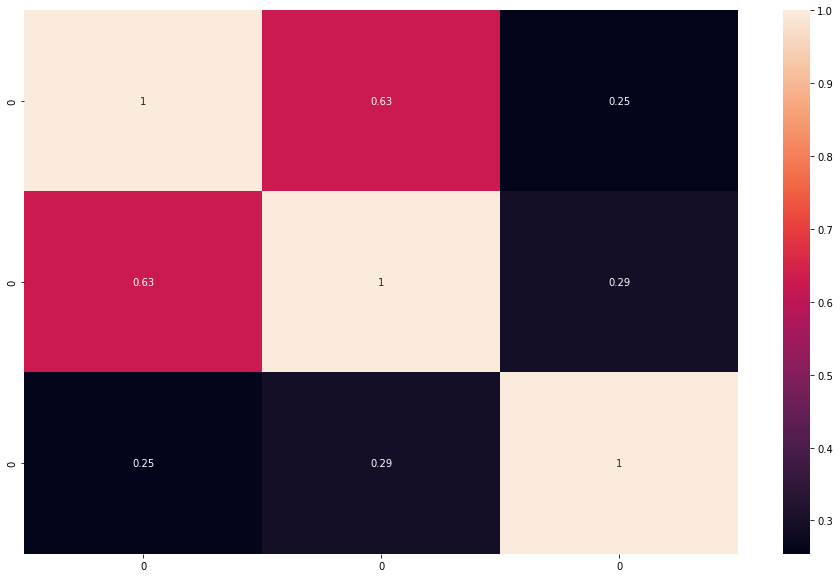

In [60]:
# Correlations of the labels across the different models?
cluster_corr = pd.concat([labels_mean_df[0],labels_hier_df[0], labels_med_df[0]],axis=1)
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(
    cluster_corr.corr(),
    annot=True,
)
plt.show()

In [ ]:
# costumer segments across features

In [ ]:
# describte across clusters (sibel) 

In [ ]:
TSNE for some cool graphics